This is a script to use sample Space Weather Modeling Framework (SWMF) ouptput from the [NASA Community Coordinated Modeling Center (CCMC)](https://ccmc.gsfc.nasa.gov/) as a demonstration to begin designing the Space Weather portion of the Synthetic Environment (e.g., with [RWI Synthetics](https://rwisynthetics.com/))

This script uses output of the CCMC capability to [calculate Magnetic Perturbations on the Ground from magnetosphere and ionospehere electrodynamics](https://ccmc.gsfc.nasa.gov/models/modelinfo.php?model=CalcDeltaB). Possible models to specify the magnetosphere and ionospehere electrodynamics include OpenGGCM, SWMF, LFM or GUMICS

Read in the data from previously simulated data at CCMC: an [attempt to simulate the Carrington Event](https://ccmc.gsfc.nasa.gov/results/viewrun.php?domain=GM&runnumber=CARR_Scenario1#CalcDeltaB)




In [73]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [96]:
# fi = 'data/CarringtonEvent_dB_CCMC_dummyData.txt'
fi = '/Users/ryanmcgranaghan/Documents/NSF_CHESS/github_pages/NSF_CHESS/data/CarringtonEvent_dBn_CCMC_dummyData.txt'
with open(fi, 'r') as the_file:
    all_data = [line.strip() for line in the_file.readlines()]
    header = all_data[:10]
    data = all_data[10:]

In [97]:
header

["# Data format string: '(4E12.4)'",
 '# Data printout from CCMC-simulation: version PD-2.0',
 '# Data type:  SWMF-deltaB',
 '# Run name:   CARR_Scenario1',
 '# Model coordinate system: GEO',
 '# Missing data:          NaN',
 '# Date, time:         2019           9           2  10:00:00',
 '# Output data: field with 201x201=40401 elements',
 '# Lon         Lat         R           dBn',
 '# R_E         R_E         R!DE!N      nT']

In [98]:
data

['0.0000E+00 -8.7500E+01  1.0000E+00  3.6970E+01',
 '1.7950E+00 -8.7500E+01  1.0000E+00  3.9973E+01',
 '3.5900E+00 -8.7500E+01  1.0000E+00  4.2810E+01',
 '5.3850E+00 -8.7500E+01  1.0000E+00  4.5515E+01',
 '7.1800E+00 -8.7500E+01  1.0000E+00  4.8142E+01',
 '8.9750E+00 -8.7500E+01  1.0000E+00  5.0753E+01',
 '1.0770E+01 -8.7500E+01  1.0000E+00  5.3412E+01',
 '1.2565E+01 -8.7500E+01  1.0000E+00  5.6156E+01',
 '1.4360E+01 -8.7500E+01  1.0000E+00  5.8992E+01',
 '1.6155E+01 -8.7500E+01  1.0000E+00  6.1906E+01',
 '1.7950E+01 -8.7500E+01  1.0000E+00  6.4858E+01',
 '1.9745E+01 -8.7500E+01  1.0000E+00  6.7793E+01',
 '2.1540E+01 -8.7500E+01  1.0000E+00  7.0659E+01',
 '2.3335E+01 -8.7500E+01  1.0000E+00  7.3422E+01',
 '2.5130E+01 -8.7500E+01  1.0000E+00  7.6067E+01',
 '2.6925E+01 -8.7500E+01  1.0000E+00  7.8604E+01',
 '2.8720E+01 -8.7500E+01  1.0000E+00  8.1068E+01',
 '3.0515E+01 -8.7500E+01  1.0000E+00  8.3511E+01',
 '3.2310E+01 -8.7500E+01  1.0000E+00  8.5982E+01',
 '3.4105E+01 -8.7500E+01  1.000

In [108]:
# the datetime information

# data_years = [d.split()[0] for d in data]
# data_months = [d.split()[1] for d in data]
# data_days = [d.split()[2] for d in data]
# data_hours = [d.split()[3] for d in data]
# data_minutes = [d.split()[4] for d in data]
# data_seconds = [d.split()[5] for d in data]
# data_list_datetimes = np.column_stack( (data_years,data_months,data_days,data_hours,data_minutes,data_seconds) )
# data_datetimes = [dt.datetime( int(d[0]),int(d[1]),int(d[2]),int(d[3]),int(d[4])  ) for d in data_list_datetimes]

data_date = header[6].split()
data_datetime = dt.datetime(int(data_date[3]),
                            int(data_date[4]),
                            int(data_date[5]),
                            int(data_date[6][0:2]),
                            int(data_date[6][3:5]),
                            int(data_date[6][6:8]))
print(data_datetime)   


# the locations of the observation
data_longs = [float(d.split()[0]) for d in data]
data_lats = [float(d.split()[1]) for d in data]
data_R = [float(d.split()[2]) for d in data]

# the magnetic field deflections
data_dBn = [float(d.split()[3]) for d in data]
# data_dBe = [d.split()[4] for d in data]
# data_dBd = [d.split()[5] for d in data]




2019-09-02 10:00:00


<ipython-input-112-39b26c909d1a>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(np.reshape(data_longs,(201,201)),


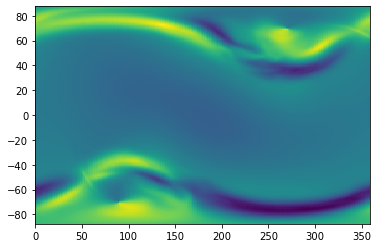

In [112]:
fig = plt.figure()
plt.pcolor(np.reshape(data_longs,(201,201)),
           np.reshape(data_lats,(201,201)),
           np.reshape(data_dBn,(201,201)))
plt.show()